### 1. Get data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def load_data():
    url = r"https://raw.githubusercontent.com/sijiao-liu/customer-car-prediction/refs/heads/main/data/car_sales.csv"
    return pd.read_csv(url)

/home/shayan/.local/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
c = load_data()
c.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville



### 2. Explore data

2.1 Datasets information and types

In [3]:
c.info()
c.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


(23906, 16)

In [13]:
# Removing extra columns
extra_columns = [
    'Car_id',
    'Customer Name',
    'Dealer_Name',
    'Phone',
    'Dealer_No '
]

c = c.drop(columns=extra_columns)

# Display the cleaned DataFrame
print(c.head())

       Date Gender  Annual Income   Company       Model  \
0  1/2/2022   Male          13500      Ford  Expedition   
1  1/2/2022   Male        1480000     Dodge     Durango   
2  1/2/2022   Male        1035000  Cadillac    Eldorado   
3  1/2/2022   Male          13500    Toyota      Celica   
4  1/2/2022   Male        1465000     Acura          TL   

                      Engine Transmission       Color  Price ($) Body Style  \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000        SUV   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000        SUV   
2          Overhead Camshaft       Manual         Red      31500  Passenger   
3          Overhead Camshaft       Manual  Pale White      14000        SUV   
4  DoubleÂ Overhead Camshaft         Auto         Red      24500  Hatchback   

  Dealer_Region  
0    Middletown  
1        Aurora  
2    Greenville  
3         Pasco  
4    Janesville  


In [14]:
# Check for null values
null_values = c.isnull().sum()

print(null_values)

Date             0
Gender           0
Annual Income    0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Body Style       0
Dealer_Region    0
dtype: int64


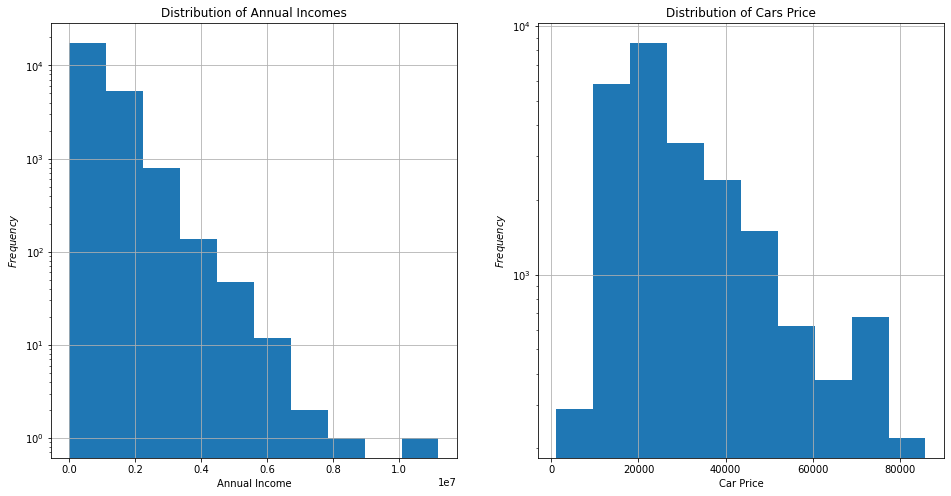

In [24]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
c["Annual Income"].hist(log=True)
plt.title("Distribution of Annual Incomes")  
plt.xlabel("Annual Income")  
plt.ylabel("$Frequency$")  

plt.subplot(1, 2, 2)
c["Price ($)"].hist(log=True)
plt.title("Distribution of Cars Price")  
plt.xlabel("Car Price")  
plt.ylabel("$Frequency$")  

plt.show()

### Dataset is clean!

# Next Steps:

Convert categorical variables to numerical

Feature scaling

Correlations